# Figures

In [2]:
import pandas as pd
import geopandas as gpd
import os
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

## Figure 1

Projected Routes: 100%|████████| 109/109 [00:40<00:00,  2.69it/s]


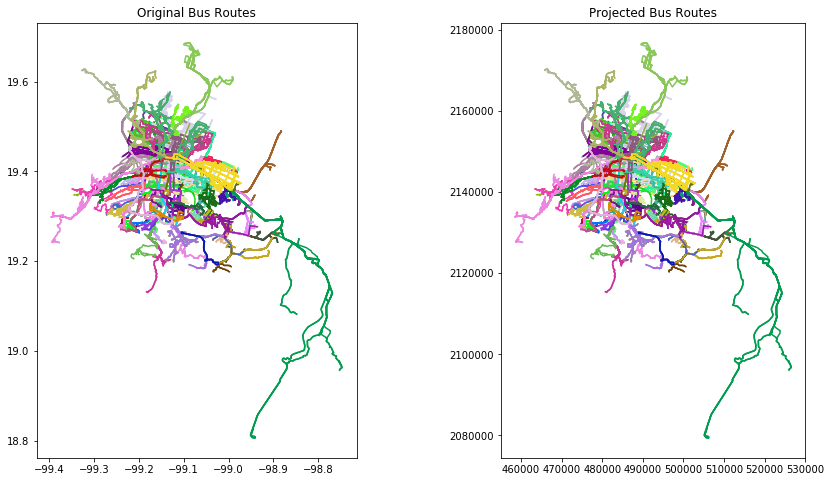

In [13]:
ORIGINAL_PATH = '../Data/Bus Routes/Original'
PROJECTED_PATH = '../Data/Bus Routes/Projected'

fig, ax = plt.subplots(1,2, figsize = (15, 8))


ax[0].set_title('Original Bus Routes')

files = []
for file in os.listdir(ORIGINAL_PATH):
    if ".shp" in file: files.append(file)
        
colors = [np.random.rand(3,) for _ in range(len(files))]

for i,file in enumerate(tqdm(files,"Original Routes")):
    path = os.path.join(ORIGINAL_PATH,file)
    df = gpd.read_file(path)
    df.plot(ax=ax[0], color = colors[i])
    
ax[1].set_title('Projected Bus Routes')
    
files = []
for file in os.listdir(PROJECTED_PATH):
    if ".shp" in file: files.append(file)

for i,file in enumerate(tqdm(files,"Projected Routes")):
    path = os.path.join(PROJECTED_PATH,file)
    df = gpd.read_file(path)
    df.plot(ax=ax[1], color = colors[i])

Subtitle: Left - Bus routes in ESPG:4326 , Right - Bus routes in ESPG:32614

Figure 1 depicts the projection of the bus routes from the ESPG:4326 to ESPG:32614. The former has units of longitude/latitude and the latter is in meters, making calculations for length more meaningful.

## Figure 2

C:\Users\rahej\.conda\envs\machinelearning\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


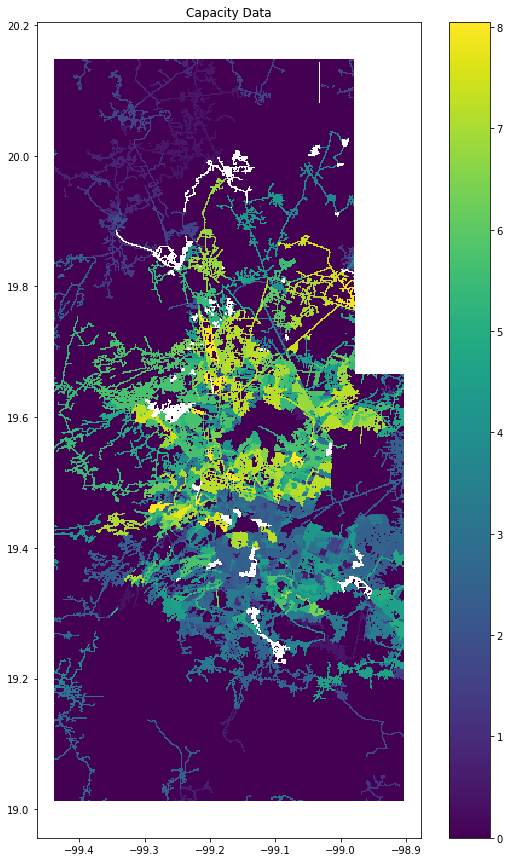

In [3]:
CAPACITY_DATA = "../Data/Energy Capacity/Scraping Results/final_results.shp"
BUS_ROUTES = "../Data/Bus Routes/Projected"
OUTPUT = "../Data/Energy Capacity/Route Data/"

city_data = gpd.read_file(CAPACITY_DATA)
city_data.crs = {'init': 'epsg:4326', 'no_defs': True}

fig, ax = plt.subplots(figsize = (10,15))
ax.set_title('Capacity Data')
city_data.plot(ax=ax, column = 'capacidadD', legend = True)

pass

Subtitle: Energy capacity throughout Mexico City
    
Figure 2 depicts the energy capacity for 250m by 250m squares in Mexico City. The region in the north-east was not collected since none of the bus routes ran through it.

## Figure 3

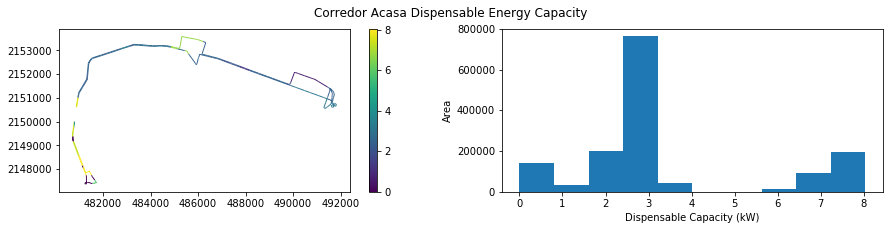

In [7]:
path = os.path.join(OUTPUT, 'CORREDOR ACASA.shp')

df = gpd.read_file(path)

fig, ax = plt.subplots(1,2,figsize = (15, 3))

fig.suptitle('Corredor Acasa Dispensable Energy Capacity')

df.plot(ax = ax[0], column = 'capacidadD', legend=True)

ax[1].hist(df['capacidadD'], weights = df['geometry'].area,bins = 10)
ax[1].set_xlabel('Dispensable Capacity (kW)')
ax[1].set_ylabel('Area')

pass

C:\Users\rahej\.conda\envs\machinelearning\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


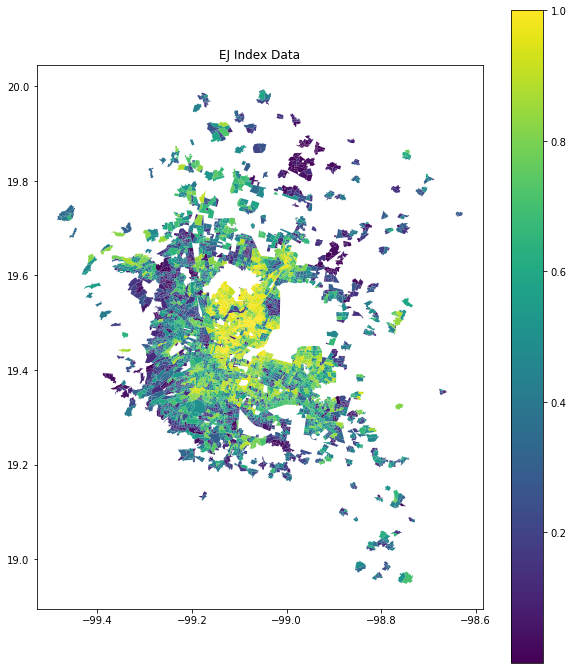

In [11]:
EJ_DATA = "../Data/EJ Index/Input/GreaterCDMX_AggregatedIndex.shp"
BUS_ROUTES = "../Data/Bus Routes/Projected"
OUTPUT = "../Data/EJ Index/Route Data/"

city_data = gpd.read_file(EJ_DATA)
city_data.crs = {'init': 'epsg:4326', 'no_defs': True}

fig, ax = plt.subplots(figsize = (10,12))
ax.set_title('EJ Index Data')
city_data.plot(ax=ax, column = 'Index_CS_6', legend = True)

pass

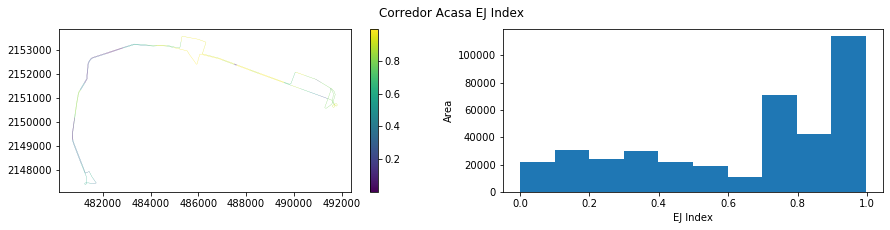

In [10]:
path = os.path.join(OUTPUT, 'CORREDOR ACASA.shp')

df = gpd.read_file(path)

fig, ax = plt.subplots(1,2,figsize = (15, 3))

fig.suptitle('Corredor Acasa EJ Index')

df.plot(ax = ax[0], column = 'Index_CS_6', legend=True)

ax[1].hist(df['Index_CS_6'], weights = df['geometry'].area, bins = 10)
ax[1].set_xlabel('EJ Index')
ax[1].set_ylabel('Area')

pass

## Figure 4

Reading Data: 100%|████████████| 109/109 [00:14<00:00,  7.67it/s]


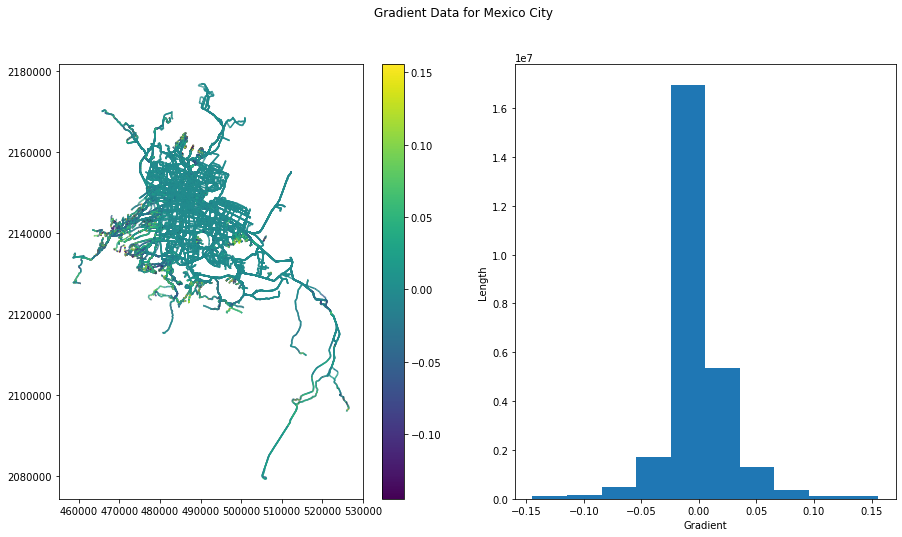

In [18]:
PROJECTED_PATH = '../Data/Bus Routes/Projected'
RAW_OUTPUT_PATH = '../Data/Gradient Data/Raw'
ADJUSTED_OUTPUT_PATH = '../Data/Gradient Data/Adjusted'

files = []
for file in os.listdir(ADJUSTED_OUTPUT_PATH):
    if ".shp" in file: files.append(file)

full_df = gpd.GeoDataFrame()
        
fig, ax = plt.subplots(1,2,figsize = (15, 8))
for file in tqdm(files, "Reading Data"):
    path = os.path.join(ADJUSTED_OUTPUT_PATH,file)
    df = gpd.read_file(path)
    full_df = full_df.append(df)
    

fig.suptitle('Gradient Data for Mexico City')

full_df.plot(ax = ax[0], column = 'grade', legend = True)

ax[1].hist(full_df['grade'], weights = full_df['geometry'].length)
ax[1].set_xlabel('Gradient')
ax[1].set_ylabel('Length')

pass

## Figure 5
_Note: The legends are capped at 10 and should probably be edited to 10+_

Loading and Plotting: 100%|██████| 12/12 [04:23<00:00, 21.92s/it]


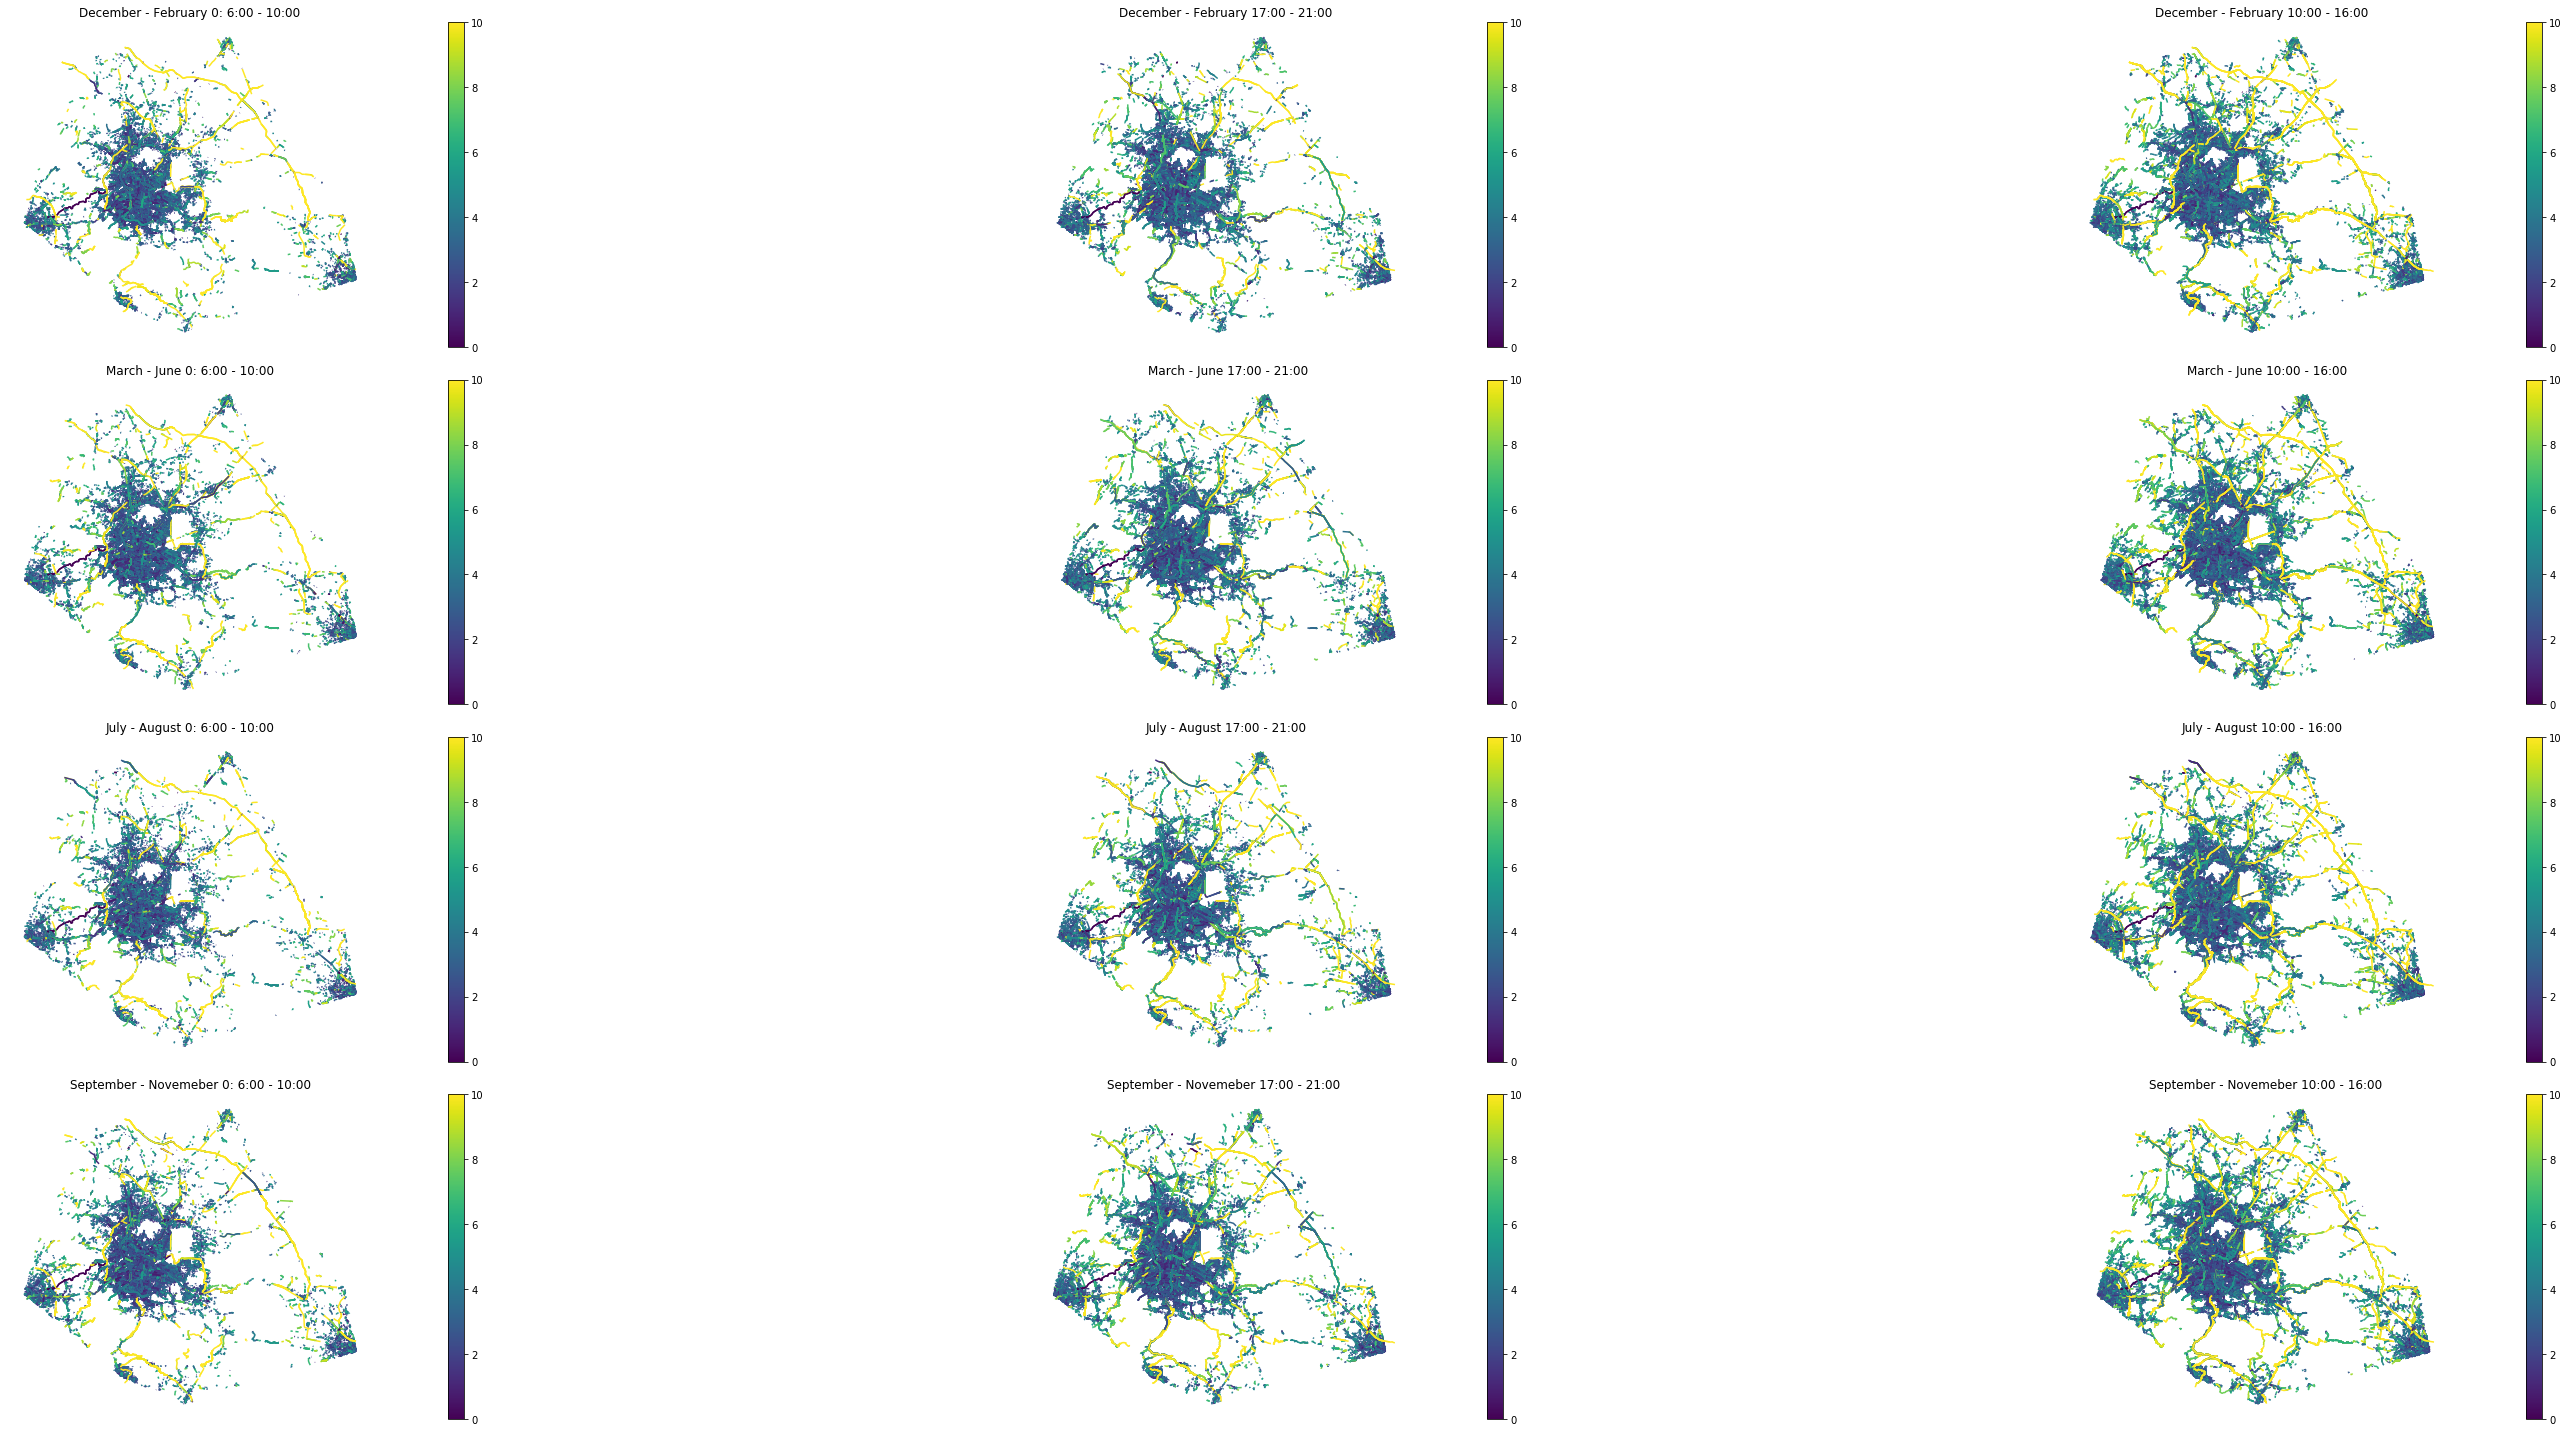

In [23]:

DATA_PATH = '../Data/Speed Data/Merged/'

fig, ax = plt.subplots(4,3, figsize = (50,20))

months = ['December - February', 'March - June', 'July - August','September - Novemeber']
hours = ['0: 6:00 - 10:00','17:00 - 21:00', '10:00 - 16:00']

for k in tqdm(range(12),"Loading and Plotting"):
    i,j = k//3, k%3
        
    path = DATA_PATH + '%d_%d.shp' % (i,j)

    df = gpd.read_file(path)

    ax[i][j].axis('off')
    df.plot(ax = ax[i][j], column = 'speed', vmin = 0, vmax = 10, legend=True)
    ax[i][j].set_title('%s %s' % (months[i], hours[j]))
        
    
fig.tight_layout()

## Figure 6

Text(0.5, 1, 'Speed Distribution Along Corredor Acasa')

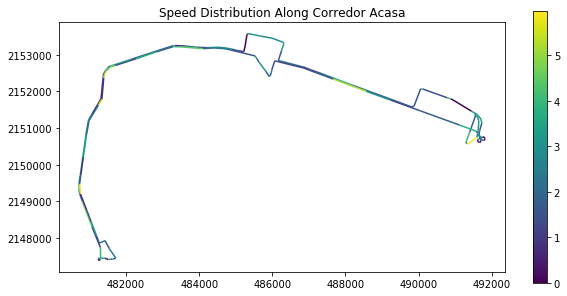

In [14]:
SAMPLE_PATH = '../Data/Speed Data/Sample/CORREDOR_ACASA_SPEED.shp' #Use the same route 

fig, ax = plt.subplots(figsize = (10, 5))

df = gpd.read_file(SAMPLE_PATH)

df.plot(column='speed', legend = True, ax = ax)
ax.set_title('Speed Distribution Along Corredor Acasa')

In [20]:
print(min(full_df['grade']), max(full_df['grade']))

-0.144837875749788 0.155859258845333


In [22]:
np.std(full_df['grade'])

0.04496980303566372